# Import and clean data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/kaggle/input/real-estate-estonia/data/2022-10-23/apartments/sale/harju/properties.csv'

In [3]:
data = pd.read_csv(path, index_col=0)

In [4]:
data.columns

Index(['Seisukord', 'Tube', 'Magamistube', 'Üldpind', 'Korrus',
       'Korruseid kokku', 'Omandiõigus', 'Turvasüsteem', 'Hind',
       'Energiamärgis', 'Materjal', 'Ehitusaasta', 'Küte', 'Sanitaar',
       'Vannitube', 'Lisaväärtused', 'Lisaruumid', 'Pliit', 'Side',
       'Rõdu pind', 'Tagatisraha', 'Suve kommunaalid', 'Talve kommunaalid',
       'Kinnistu number', 'Lift', 'Rõdu', 'Parkimine', 'Katus', 'Krunt',
       'Lisanduvad kommunaalkulud', 'Lisainfo', 'tasuta parkimine',
       'Ventilatsioon', 'Parkimiskohti', 'tasuline parkimine',
       'Lisanduvad kommunaalid', 'Maakleritasu', 'Piirangud'],
      dtype='object')

In [5]:
# Dropping uninformative columns with little to no values
DROP_COLS = ['Omandiõigus','Turvasüsteem','Krunt', 'Vannitube'
             ,'Pliit','Side','Tagatisraha','Kinnistu number'
             ,'Katus','Lisanduvad kommunaalkulud','Lisainfo','Parkimiskohti'
             ,'tasuline parkimine','Piirangud','Maakleritasu','Lisanduvad kommunaalid'
             ,'Lisaväärtused','Lisaruumid','Parkimine','tasuta parkimine','Ventilatsioon','Suve kommunaalid','Talve kommunaalid']
df = data.drop(DROP_COLS, axis=1)
df = df[~df['Hind'].isna()]
df = df[~df['Üldpind'].isna()]
df = df[~df['Tube'].isna()]


In [6]:
df = df[~df['Hind'].isna()]
df = df[~df['Üldpind'].isna()]
df = df[~df['Tube'].isna()]

In [7]:
df['Rõdu pind'] = df['Rõdu pind'] .fillna(0)
df['flag_balcony'] = (df['Rõdu pind']!=0).astype(int)
df['flag_lift'] = (~df['Lift'].isna()).astype(int)
df.drop(['Rõdu','Rõdu pind','Lift'], axis=1, inplace=True)

<AxesSubplot:>

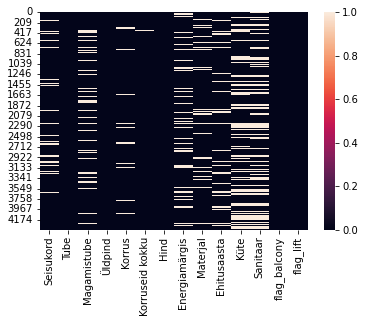

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['Energiamärgis'].unique()

array(['energiamärgis määramata', 'A', 'B', 'E', 'C', 'D', nan, 'F', 'H',
       'G', 'A,A'], dtype=object)

In [10]:
df['Sanitaar'].unique()[0:15]

array(['dušš', 'dušš,wc ja vannituba eraldi,saun', nan,
       'vann,dušš,pesumasin',
       'pesumasin,wc ja vannituba eraldi,dušš,tsentraalne kanalisatsioon',
       'dušš,pesumasin', 'pesumasin,vann',
       'pesumasin,dušš,tsentraalne kanalisatsioon',
       'pesumasin,vann,wc ja vannituba eraldi', 'vann,saun,pesumasin',
       'wc ja vannituba eraldi', 'tsentraalne kanalisatsioon,dušš',
       'dušš,saun', 'dušš,pesumasin,saun',
       'dušš,wc ja vannituba eraldi,vann,pesumasin'], dtype=object)

In [11]:
# In order to preserve as much data as possible, filling NAs. Useful for feature engineering later.
df['Materjal'] = df['Materjal'].fillna('Unknown')
df['Küte'] = df['Küte'].fillna('Unknown')
df['Seisukord'] = df['Seisukord'].fillna('Unknown')
df['Sanitaar'] = df['Sanitaar'].fillna('Unknown')
df['Energiamärgis'] = df['Energiamärgis'].fillna('energiamärgis määramata')
df = df.replace("A,A","A")

In [12]:
df['flag_shower'] = df['Sanitaar'].apply(lambda x: int('dušš' in x.strip().lower()))
df['flag_bath'] = df['Sanitaar'].apply(lambda x: int('vann' in x.strip().lower()))
df['flag_sauna'] = df['Sanitaar'].apply(lambda x: int('saun' in x.strip().lower()))
df.drop('Sanitaar', axis=1, inplace=True)

In [13]:
df['Küte'].unique()[0:15]

array(['keskküte', 'õhksoojuspump', 'õhk-vesi soojuspump', 'gaasiküte',
       'põrandaküte,keskküte,gaasiküte', 'Unknown',
       'põrandaküte,keskküte', 'põrandaküte', 'keskküte,põrandaküte',
       'õhksoojuspump,elektriküte', 'gaasiküte,kamin',
       'elektriküte,kamin', 'põrandaküte,gaasiküte', 'kamin,gaasiküte',
       'gaasiküte,põrandaküte'], dtype=object)

In [14]:
df['flag_generalheat'] = df['Küte'].apply(lambda x: int('keskküte' in x.strip().lower()))
df['flag_floorheat'] = df['Küte'].apply(lambda x: int('põrandaküte' in x.strip().lower()))
df['flag_gasheat'] = df['Küte'].apply(lambda x: int('gaasiküte' in x.strip().lower()))
df['flag_electricalheat'] = df['Küte'].apply(lambda x: int('õhksoojuspump' in x.strip().lower()))
df.drop('Küte', axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336 entries, 0 to 4370
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Seisukord            4336 non-null   object 
 1   Tube                 4336 non-null   float64
 2   Magamistube          3642 non-null   float64
 3   Üldpind              4336 non-null   float64
 4   Korrus               4164 non-null   float64
 5   Korruseid kokku      4273 non-null   float64
 6   Hind                 4336 non-null   float64
 7   Energiamärgis        4336 non-null   object 
 8   Materjal             4336 non-null   object 
 9   Ehitusaasta          3844 non-null   float64
 10  flag_balcony         4336 non-null   int64  
 11  flag_lift            4336 non-null   int64  
 12  flag_shower          4336 non-null   int64  
 13  flag_bath            4336 non-null   int64  
 14  flag_sauna           4336 non-null   int64  
 15  flag_generalheat     4336 non-null   i

In [16]:
df[df.Korrus.isnull()].head()

,Seisukord,Tube,Magamistube,Üldpind,Korrus,Korruseid kokku,Hind,Energiamärgis,Materjal,Ehitusaasta,flag_balcony,flag_lift,flag_shower,flag_bath,flag_sauna,flag_generalheat,flag_floorheat,flag_gasheat,flag_electricalheat
1,uusehitis,4.0,3.0,101.1,NaN,2.0,315000.0,A,kivimaja,2023.0,1,0,1,1,1,0,0,0,1
11,vajab renoveerimist,2.0,1.0,95.7,NaN,2.0,275000.0,energiamärgis määramata,Unknown,2008.0,0,0,0,0,0,0,0,0,0
13,valmis,3.0,3.0,64.8,NaN,9.0,133000.0,E,paneelmaja,1987.0,1,1,0,0,0,0,0,0,0
26,valmis,3.0,2.0,83.9,NaN,2.0,379650.0,energiamärgis määramata,kivimaja,2021.0,1,0,1,1,0,1,1,0,0
33,uusehitis,4.0,3.0,127.7,NaN,3.0,315000.0,energiamärgis määramata,kivimaja,2009.0,1,0,1,1,1,0,0,1,0


In [17]:
df = df[~df['Ehitusaasta'].isnull()]

In [18]:
df['Korrus'] = df['Korrus'].fillna(df.groupby('Korruseid kokku')['Korrus'].transform('mean'))

In [19]:
# total floors probably not so important
df.drop('Korruseid kokku', axis=1, inplace=True)

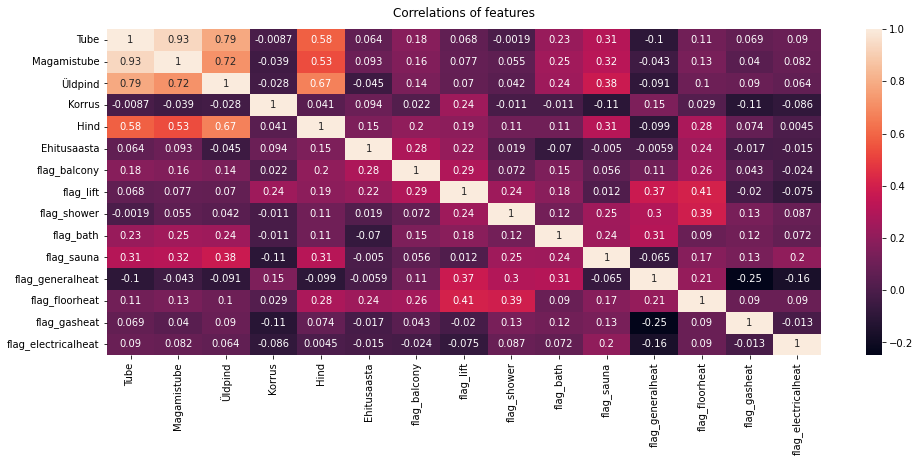

In [20]:
plt.figure(figsize=(16, 6))
correlations = sns.heatmap(df.corr(), annot=True)
correlations.set_title('Correlations of features', fontdict={'fontsize':12}, pad=12);

In [21]:
#Bedrooms correlated with rooms, so lets calculate medina
df['Magamistube'] = df['Magamistube'].fillna(df.groupby('Tube')['Magamistube'].transform('mean'))

In [22]:
df['Materjal'].unique()[0:25]

array(['kivimaja', 'betoonmaja', 'betoonmaja,kivimaja', 'paneelmaja',
       'Unknown', 'puitmaja', 'betoonmaja,kivimaja,plokkmaja',
       'plokkmaja,paneelmaja', 'kivimaja,paneelmaja', 'plokkmaja',
       'paneelmaja,kivimaja', 'betoonmaja,paneelmaja,kivimaja',
       'paneelmaja,kivimaja,plokkmaja', 'palk-kivimaja', 'palkmaja',
       'plokkmaja,kivimaja', 'betoonmaja,plokkmaja',
       'paneelmaja,kivimaja,betoonmaja', 'kivimaja,plokkmaja',
       'betoonmaja,paneelmaja', 'paneelmaja,betoonmaja',
       'puitmaja,palk-kivimaja', 'plokkmaja,kivimaja,betoonmaja',
       'paneelmaja,plokkmaja,kivimaja', 'kivimaja,betoonmaja,paneelmaja'],
      dtype=object)

In [23]:
df['flag_brick'] = df['Materjal'].apply(lambda x: int('plokkmaja' in x.strip().lower()))
df['flag_panel'] = df['Materjal'].apply(lambda x: int('paneelmaja' in x.strip().lower()))
df['flag_beton'] = df['Materjal'].apply(lambda x: int('betoonmaja' in x.strip().lower()))
df['flag_stone'] = df['Materjal'].apply(lambda x: int('kivimaja' in x.strip().lower()))
df['flag_wood'] = df['Materjal'].apply(lambda x: int('puitmaja' in x.strip().lower()))
df.drop('Materjal', axis=1, inplace=True)

In [24]:
df['Seisukord'].unique()[0:25]

array(['vajab renoveerimist', 'uusehitis', 'valmis',
       'valmis,renoveeritud', 'renoveeritud', 'Unknown',
       'vajab kapitaalremonti', 'uusehitis,uus viimistlus',
       'valmimisjärgus', 'renoveeritud,valmis',
       'uus viimistlus,uusehitis,valmis',
       'vajab kapitaalremonti,vajab renoveerimist,valmis',
       'uus viimistlus,renoveeritud,valmis', 'uusehitis,valmis',
       'valmis,renoveeritud,uus viimistlus', 'uus viimistlus,valmis',
       'san remont tehtud', 'valmis,uusehitis', 'uus viimistlus',
       'uus viimistlus,valmis,renoveeritud',
       'uus viimistlus,renoveeritud,uusehitis,valmis',
       'uusehitis,valmis,renoveeritud,uus viimistlus',
       'san remont tehtud,renoveeritud,uus viimistlus,valmis',
       'valmis,vajab renoveerimist', 'uus viimistlus,renoveeritud'],
      dtype=object)

In [25]:
df['flag_newbuilding'] = df['Seisukord'].apply(lambda x: int('uusehitis' in x.strip().lower()))
df['flag_indevelopment'] = df['Seisukord'].apply(lambda x: int('valmimisjärgus' in x.strip().lower()))
df['flag_renovated'] = df['Seisukord'].apply(lambda x: int('renoveeritud' in x.strip().lower()))
df['flag_needsrenovation'] = df['Seisukord'].apply(lambda x: int('vajab renoveerimist' in x.strip().lower()))
df.drop('Seisukord', axis=1, inplace=True)

In [26]:
df = df[~df['Korrus'].isnull()]
df = df[~df['Magamistube'].isnull()]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3830 entries, 0 to 4370
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Tube                  3830 non-null   float64
 1   Magamistube           3830 non-null   float64
 2   Üldpind               3830 non-null   float64
 3   Korrus                3830 non-null   float64
 4   Hind                  3830 non-null   float64
 5   Energiamärgis         3830 non-null   object 
 6   Ehitusaasta           3830 non-null   float64
 7   flag_balcony          3830 non-null   int64  
 8   flag_lift             3830 non-null   int64  
 9   flag_shower           3830 non-null   int64  
 10  flag_bath             3830 non-null   int64  
 11  flag_sauna            3830 non-null   int64  
 12  flag_generalheat      3830 non-null   int64  
 13  flag_floorheat        3830 non-null   int64  
 14  flag_gasheat          3830 non-null   int64  
 15  flag_electricalheat  

# Model

In [28]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OrdinalEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_predict
from sklearn.pipeline import make_pipeline
import numpy as np


In [29]:
target_column = 'Hind'


In [30]:
categorical_cols = [c for c in df.columns if df[c].dtype in [object]]
numerical_cols = [c for c in df.columns if df[c].dtype in [float, int] and c not in [target_column]]

In [31]:
print(categorical_cols)
X = df[numerical_cols+categorical_cols]
y = df[target_column]

['Energiamärgis']


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
def cv(model, params):
    grid = GridSearchCV(model, params, scoring='neg_root_mean_squared_error', cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    return(grid.best_estimator_)

In [34]:
lgbm = LGBMRegressor()
params = {}
params['lgbmregressor__num_leaves'] = [7, 14, 21, 28, 31, 50]
params['lgbmregressor__max_depth'] = [-1, 3, 5, 8]
params['lgbmregressor__learning_rate'] = [0.15,0.1, 0.01, 0.001]
params['lgbmregressor__boosting_type'] = ['gbdt','dart','goss']


model = make_pipeline(ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),    
    ]),
    lgbm)

In [35]:
best_model = cv(model,params)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
print("The RMSFE error is:", round(mean_squared_error(y_test,preds)**(1/2),2))
print("The R2 is:", round(r2_score(y_test, preds),2))

{'lgbmregressor__boosting_type': 'goss', 'lgbmregressor__learning_rate': 0.1, 'lgbmregressor__max_depth': 8, 'lgbmregressor__num_leaves': 21}
The RMSFE error is: 54609.15
The R2 is: 0.79


In [36]:
rf = RandomForestRegressor()
params = {}
params['randomforestregressor__max_depth'] = [1,5,15,30]
params['randomforestregressor__n_estimators'] = [10,50,100,150]
params['randomforestregressor__min_samples_split'] = [2,4,8]
params['randomforestregressor__max_features'] = ["auto", "sqrt", "log2"]
params['randomforestregressor__bootstrap'] = [True, False]

model = make_pipeline(ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),    
    ]),rf
    )

In [37]:
best_model = cv(model,params)
best_model.fit(X_train, y_train)
preds = best_model.predict(X_test)
print("The RMSFE error is:", round(mean_squared_error(y_test,preds)**(1/2),2))
print("The R2 is:", round(r2_score(y_test, preds),2))

{'randomforestregressor__bootstrap': False, 'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 'log2', 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 50}
The RMSFE error is: 50327.49
The R2 is: 0.82


In [38]:
lm = LinearRegression()
model = make_pipeline(ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),    
    ]),lm
    )
model.fit(X_train,y_train)
preds = model.predict(X_test)
print("The RMSFE error is:", round(mean_squared_error(y_test,preds)**(1/2),2))
print("The R2 is:", round(r2_score(y_test, preds),2))

The RMSFE error is: 68991.71
The R2 is: 0.67
